# Assignment Information

- Assignment: Homework 5
- Author: Charles Hoyt
- Due: June 3 2016
- Language: R
- Posted: https://github.com/cthoyt/notebooks/blob/master/bit/abi/AbiHomework5.ipynb

In [1]:
version

               _                           
platform       x86_64-apple-darwin15.4.0   
arch           x86_64                      
os             darwin15.4.0                
system         x86_64, darwin15.4.0        
status                                     
major          3                           
minor          3.0                         
year           2016                        
month          05                          
day            03                          
svn rev        70573                       
language       R                           
version.string R version 3.3.0 (2016-05-03)
nickname       Supposedly Educational      

# Exercise 1

The following table lists the duration of pregnancy for different species 
together with their expected life time in years.


| Species | Pregnancy (weeks) | Expected life time |
|---|---|---|
| Lemur | 18 | 18 |
| Macaque | 24 | 26 |
| Gibbon | 30 | 30 |
| Chimpanze | 34 | 40 |
| Human | 40 | 70 |

## Exercise 1A

Determine the coefficients of the linear regression, which describes the
expected life time as a function of the duration of pregnancy manually. (3
points + 1 bonus point)

Using $x$ for pregnancy time and $y$ for expected life time

$\bar{x} = \frac{18 + 24 + 30 + 34 + 40}{5} = \frac{146}{5} = 29.2$

$\bar{y} = \frac{18 + 26 + 30 + 40 + 70}{5} = \frac{184}{5} = 36.8$

$x_{shifted} = x - \bar{x} = (18 - 29.2, 24 - 29.2, 30 - 29.2, 34 - 29.2, 40 - 29.2) = (-11.2, -5.2, 0.8, 4.8, 10.8)$

$y_{shifted} = y - \bar{y} = (18 - 36.8, 26 - 36.8, 30 - 36.8, 40 - 36.8, 70 - 36.8) = (-18.8, -10.8, -6.8, 3.2, 33.2)$

| array           | 1      | 2      | 3      | 4      | 5      |
| ---             | ---    | ---    | ---    | ---    | ---    |
| $x$             | 18     | 24     | 30     | 34     | 40     | 
| $x-\bar{x}$     | -11.2  | -5.2   | 0.8    | 4.8    | 10.8   |
| $(x-\bar{x})^2$ | 125.44 | 27.04  | 0.64   | 23.04  | 116.64 | 
| $y$             | 18     | 26     | 30     | 40     | 70     | 
| $y-\bar{y}$     | -18.8  | -10.8  | -6.8   | 3.2    | 33.2   |

$a = \sum_i (x_i - \bar{x})(y_i - \bar{y}) = \sum_i (x_{shifted_i})(y_{shifted_i}) = (-11.2 * -18.8) + (-5.2 * -10.8) + (0.8 * -6.8) + (4.8 * 3.2) + (10.8 * 33.2) = 635.2$

$b = \sum_i (x_i - \bar{x})^2 = \sum_i x_{shifted_i}^2 = (-11.2)^2 + (-5.2)^2 + (0.8)^2 + (4.8)^2 + (10.8)^2 = 292.8$

$\hat{\beta} = \frac{a}{b} = \frac{cov(x, y)}{var(x)} = \frac{635.2}{292.8} \approx 2.169$

$\hat{\beta_0} = \bar{y} - \hat{\beta}\bar{x} = 36.8 - (2.169)(29.2) \approx -26.545$


## Exercise 1B

Compute the residual variance. (2 points + 1 bonus point)

$\hat{y} = \hat{\beta_0} + \hat{\beta} x = (-26.545 + 2.169 * 18,-26.545 + 2.169 * 24,-26.545 + 2.169 * 30,-26.545 + 2.169 * 34,-26.545 + 2.169 * 40) = (12.497, 25.511, 38.525, 47.201, 60.215)$

| array           | 1      | 2      | 3      | 4      | 5      |
| ---             | ---    | ---    | ---    | ---    | ---    |
| $y$             | 18     | 26     | 30     | 40     | 70     | 
| $\hat{y}$       | 12.497 | 25.511 | 38.525 | 47.201 | 60.215 |
| $y-\hat{y}$     | 5.503  | 0.489  | -8.525 | -7.201 | 9.785  | 
| $(y-\hat{y})^2$ | 30.283 | 0.239  | 72.676 | 51.854 | 95.746 | 

$\hat{\eta}^2 = \frac{1}{n-2} \sum_{i=1}^{n}{(y_i - \hat{y_i})}^2 = \frac{30.283 + 0.239 + 72.676 + 51.854 + 95.746 }{5-2} = 83.59$

$\hat{\eta} = \sqrt{83.59} \approx 9.143$

## Exercise 1C

Compute the standard error of the slope coefficient β and manually test the
hypothesis $H_0: \beta = 0$. (3 points + 1 bonus point)

$se(\hat{\beta}) = \hat{\eta} \sqrt{\frac{1}{(n-1)var(x)}} = 9.143 \sqrt{\frac{1}{(5-1)73.2}} \approx 0.534$

$se(\hat{\beta_0}) = \hat{\eta} \sqrt{\frac{\sum_i x_i^2}{n(n-1)var(x)}} = 9.143 \sqrt{\frac{18^2+24^2+30^2+34^2+40^2}{5(5-1)73.2}} \approx 16.129$


With hypothesis $H_0: \beta = 0$, significance can be tested with a one-sample t-test.

$z = \frac{\hat{\beta}}{se(\hat{\beta})} = \frac{2.169}{0.534} \approx 4.06$

$z \sim t_{n-2}$

In [2]:
p = 2 * (1 - pt(4.06, 5 - 2))
p

[1] 0.02693608

Interpretation: reject the null hypothesis. $\beta$ is significantly different from zero.

## Exercise 1D

Compute the 95% confidence interval for the slope coefficient. (3 points + 1
bonus point)

95% CI is $[\mu \pm 1.96 \sigma] = [\hat{\beta} \pm 1.96 * se(\hat{\beta})] = 2.169 \pm 1.96 * 0.534 = 2.169 \pm 1.047 = [1.122, 3.216]$

## Exercise 1 Follow-Up

R calculates all of this with `lm`. Below is the output, which matches the above answers.

In [3]:
x = c(18, 24, 30, 34, 40)
y = c(18, 26, 30, 40, 70)

summary(lm(y ~ x))


Call:
lm(formula = y ~ x)

Residuals:
      1       2       3       4       5 
 5.4973  0.4809 -8.5355 -7.2131  9.7705 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -26.5464    16.1296  -1.646   0.1984  
x             2.1694     0.5343   4.060   0.0269 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.143 on 3 degrees of freedom
Multiple R-squared:  0.846,	Adjusted R-squared:  0.7947 
F-statistic: 16.48 on 1 and 3 DF,  p-value: 0.02694


# Exercise 2

Consider the iris dataset introduced in the first exercise. Use R to fit a logistic regression model to separate the three plant types based on the given four predictor variables. Analyse and discuss the quality of fit and the significance of each of the predictor variables. (4 points + 1 bonus point)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


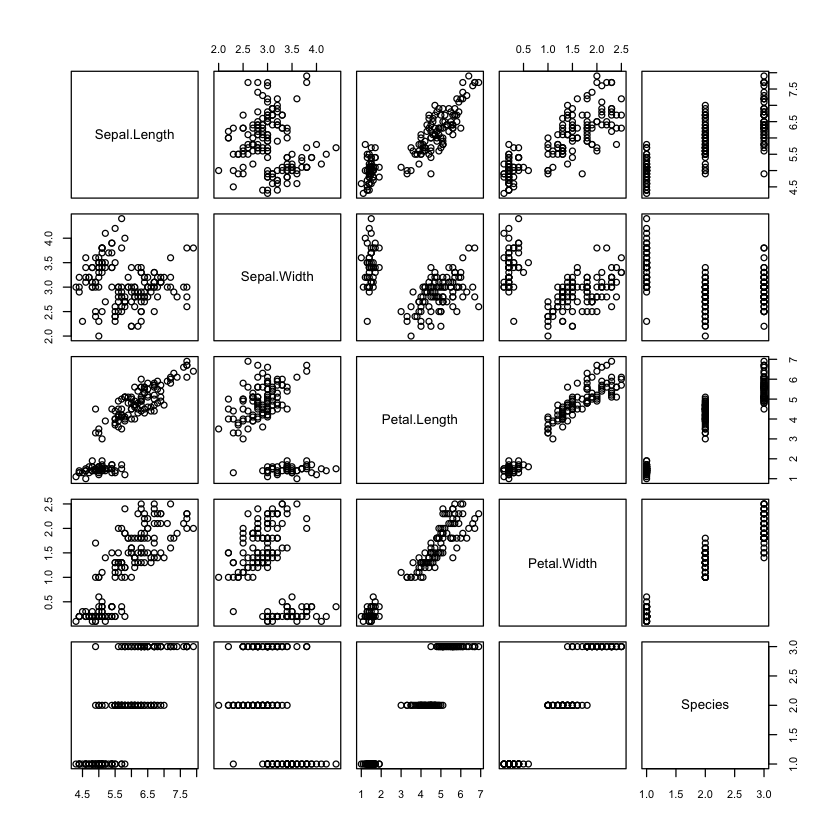

In [20]:
data(iris)
head(iris)
plot(iris)

In [ ]:
data(iris)
iris_s = iris
iris_s$setosa = as.integer(iris$Species == 'setosa')
iris_s$versicolor = as.integer(iris$Species == 'veriscolor')
iris_s$virginica = as.integer(iris$Species == 'virginica')

In [37]:
summary(glm(setosa ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
            data=iris_s, 
            family=binomial(link='logit')))

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = setosa ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, family = binomial(link = "logit"), data = iris_s)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.185e-05  -2.100e-08  -2.100e-08   2.100e-08   3.173e-05  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)     -16.946 457457.097       0        1
Sepal.Length     11.759 130504.042       0        1
Sepal.Width       7.842  59415.385       0        1
Petal.Length    -20.088 107724.594       0        1
Petal.Width     -21.608 154350.616       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.9095e+02  on 149  degrees of freedom
Residual deviance: 3.2940e-09  on 145  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [35]:
summary(glm(versicolor ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
            data=iris_s, 
            family=binomial(link='logit')))

Warning message:
: glm.fit: algorithm did not converge


Call:
glm(formula = versicolor ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, family = binomial(link = "logit"), data = iris_s)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)  -2.657e+01  3.329e+05       0        1
Sepal.Length  6.097e-15  9.370e+04       0        1
Sepal.Width  -6.327e-15  9.702e+04       0        1
Petal.Length -2.506e-15  9.240e+04       0        1
Petal.Width   8.773e-15  1.535e+05       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 149  degrees of freedom
Residual deviance: 8.7024e-10  on 145  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [38]:
summary(glm(virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
            data=iris_s, 
            family=binomial(link='logit')))

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = virginica ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, family = binomial(link = "logit"), data = iris_s)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01105  -0.00065   0.00000   0.00048   1.78065  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -42.638     25.708  -1.659   0.0972 .
Sepal.Length   -2.465      2.394  -1.030   0.3032  
Sepal.Width    -6.681      4.480  -1.491   0.1359  
Petal.Length    9.429      4.737   1.990   0.0465 *
Petal.Width    18.286      9.743   1.877   0.0605 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 190.954  on 149  degrees of freedom
Residual deviance:  11.899  on 145  degrees of freedom
AIC: 21.899

Number of Fisher Scoring iterations: 12


Each of these regressions was very poor, with the ability to differentiate virginica from non-virginica being the least poor. This is because the data are not linearly seperable, and a logistic regression is not best suited to deal with this. Other more general methods, like Multi-Layer Perceptrons or SVM, can better handle this. 

# Exercise 3

We now want to investigate whether one of the predictors can be expressed as a linear combinatioin of the others. Fit linear regression models for this purpose and analyse their quality of fit. To which conclusions do you come? (5 points + 1 bonus point)

In [39]:
summary(lm(Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width, data=iris))


Call:
lm(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82816 -0.21989  0.01875  0.19709  0.84570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.85600    0.25078   7.401 9.85e-12 ***
Sepal.Width   0.65084    0.06665   9.765  < 2e-16 ***
Petal.Length  0.70913    0.05672  12.502  < 2e-16 ***
Petal.Width  -0.55648    0.12755  -4.363 2.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3145 on 146 degrees of freedom
Multiple R-squared:  0.8586,	Adjusted R-squared:  0.8557 
F-statistic: 295.5 on 3 and 146 DF,  p-value: < 2.2e-16


In [40]:
summary(lm(Petal.Width ~ Sepal.Width + Sepal.Length + Petal.Length, data=iris))


Call:
lm(formula = Petal.Width ~ Sepal.Width + Sepal.Length + Petal.Length, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60959 -0.10134 -0.01089  0.09825  0.60685 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24031    0.17837  -1.347     0.18    
Sepal.Width   0.22283    0.04894   4.553 1.10e-05 ***
Sepal.Length -0.20727    0.04751  -4.363 2.41e-05 ***
Petal.Length  0.52408    0.02449  21.399  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.192 on 146 degrees of freedom
Multiple R-squared:  0.9379,	Adjusted R-squared:  0.9366 
F-statistic: 734.4 on 3 and 146 DF,  p-value: < 2.2e-16


### Comment 1 

When investigating the possibility of expressing the Sepal Length as a function of the other three descriptors, and also when expressing the Petal Width as a function of the other three descriptors, the standard errors of the intercept and other descriptors were all significant, meaning they were small. This shows that these descriptors can be confidently expressed as linear combinations of the other descriptors.

In [41]:
summary(lm(Petal.Length ~ Sepal.Width + Sepal.Length + Petal.Width, data=iris))


Call:
lm(formula = Petal.Length ~ Sepal.Width + Sepal.Length + Petal.Width, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99333 -0.17656 -0.01004  0.18558  1.06909 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.26271    0.29741  -0.883    0.379    
Sepal.Width  -0.64601    0.06850  -9.431   <2e-16 ***
Sepal.Length  0.72914    0.05832  12.502   <2e-16 ***
Petal.Width   1.44679    0.06761  21.399   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.319 on 146 degrees of freedom
Multiple R-squared:  0.968,	Adjusted R-squared:  0.9674 
F-statistic:  1473 on 3 and 146 DF,  p-value: < 2.2e-16


In [42]:
summary(lm(Sepal.Width ~ Sepal.Length + Petal.Length + Petal.Width, data=iris))


Call:
lm(formula = Sepal.Width ~ Sepal.Length + Petal.Length + Petal.Width, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88045 -0.20945  0.01426  0.17942  0.78125 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.04309    0.27058   3.855 0.000173 ***
Sepal.Length  0.60707    0.06217   9.765  < 2e-16 ***
Petal.Length -0.58603    0.06214  -9.431  < 2e-16 ***
Petal.Width   0.55803    0.12256   4.553  1.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3038 on 146 degrees of freedom
Multiple R-squared:  0.524,	Adjusted R-squared:  0.5142 
F-statistic: 53.58 on 3 and 146 DF,  p-value: < 2.2e-16


### Comment 2

This wasn't the case for the other two descriptors.

More generally, principal component analysis reveals that the iris data set can be expressed very well with two components, that are both orthogonal linear combinations of the four original descriptors.

# Exercise 4

A gene is measured under 3 different stimulation conditions in 2 different cell lines in triplicates. The data looks as shown in the following table:

| Cell line | Stim. 1 | Stim. 2 | Stim. 3 |
|---|---|---|---|
| A | 3.3 | 1.2 | 3.2 |
| A | 2.3 | 0.9 | 4.0 | 
| A | 2.5 | 1.5 | 2.7 |
| B | 1.3 | 1.5 | 3 |
| B | 2 | 0.7 | 3.5 |
| B | 1.5 | 1.8 | 3.3 |

In [43]:
c1 = c('A', 'A', 'A', 'B', 'B', 'B')
c2 = c(3.3, 2.3, 2.5, 1.3, 2.0, 1.5)
c3 = c(1.2, 0.9, 1.5, 1.5, 0.7, 1.8)
c4 = c(3.2, 4.0, 2.7, 3.0, 3.5, 3.3)

e4 = data.frame(c1, c2, c3, c4)
names(e4) = c('CellLine', 'Stim1', 'Stim2', 'Stim3')
e4$CellLine = factor(e4$CellLine)
e4

,CellLine,Stim1,Stim2,Stim3
1,A,3.3,1.2,3.2
2,A,2.3,0.9,4
3,A,2.5,1.5,2.7
4,B,1.3,1.5,3
5,B,2,0.7,3.5
6,B,1.5,1.8,3.3


# Exercise 4A

Fit an appropriate model to these data using two factors, one for the cell line and one for the stimulus. Analyse the model fit, also graphically. (6 points + 1 bonus point)

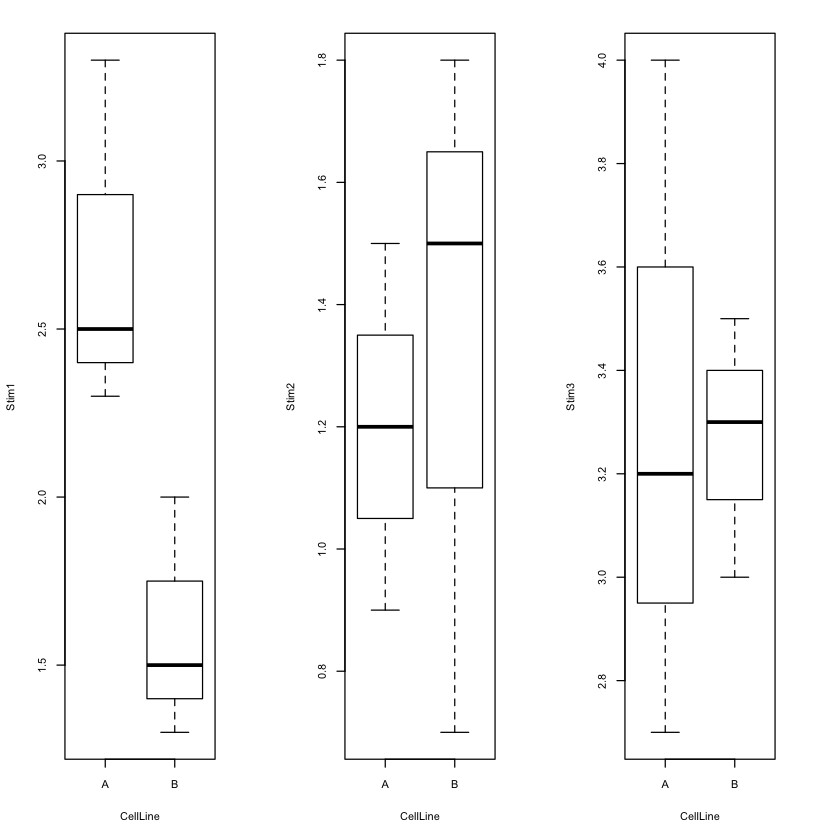

In [44]:
par(mfrow=c(1,3))
plot(Stim1~CellLine, data=e4)
plot(Stim2~CellLine, data=e4)
plot(Stim3~CellLine, data=e4)

In [47]:
e4_fit = lm(Stim1 ~ CellLine, data=e4)
summary(e4_fit)


Call:
lm(formula = Stim1 ~ CellLine, data = e4)

Residuals:
   1    2    3    4    5    6 
 0.6 -0.4 -0.2 -0.3  0.4 -0.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7000     0.2614  10.329 0.000496 ***
CellLineB    -1.1000     0.3697  -2.976 0.040920 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4528 on 4 degrees of freedom
Multiple R-squared:  0.6888,	Adjusted R-squared:  0.611 
F-statistic: 8.854 on 1 and 4 DF,  p-value: 0.04092


ERROR: Error in title(...): metric information not available for this device


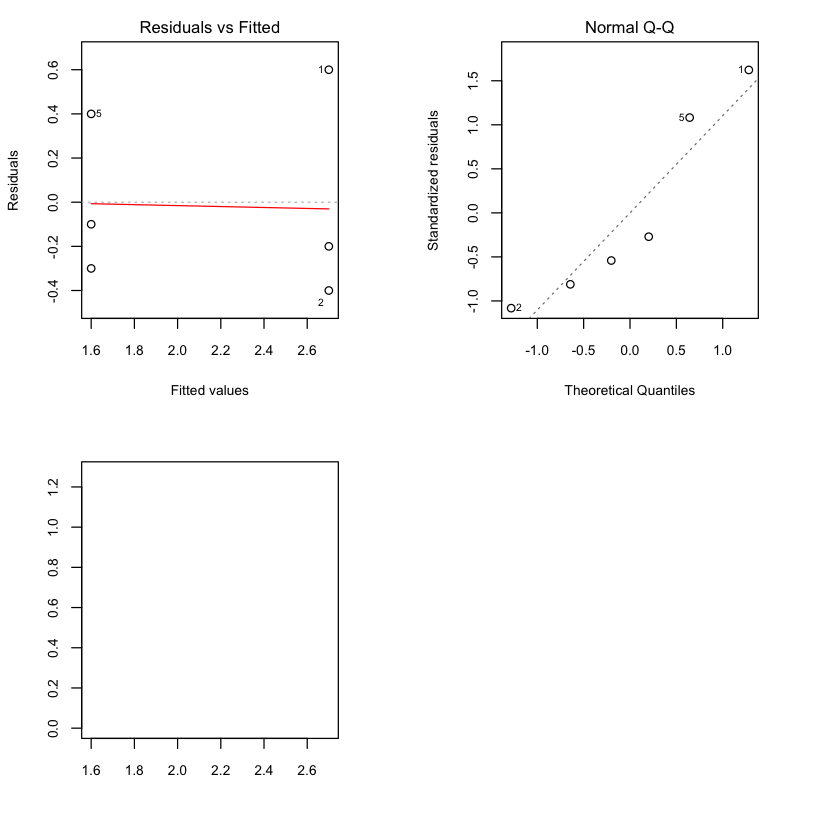

In [46]:
par(mfrow=c(2,2))
plot(e4_fit)

This is a pretty good linear model, because the residuals are normally distributed, and the qq-plot shows a generally linear trend.

# Exercise 4B 

Perform a (two-way) ANOVA and interpret the results. (4 points + 1 bonus point)

In [48]:
summary(e4_fit)


Call:
lm(formula = Stim1 ~ CellLine, data = e4)

Residuals:
   1    2    3    4    5    6 
 0.6 -0.4 -0.2 -0.3  0.4 -0.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7000     0.2614  10.329 0.000496 ***
CellLineB    -1.1000     0.3697  -2.976 0.040920 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4528 on 4 degrees of freedom
Multiple R-squared:  0.6888,	Adjusted R-squared:  0.611 
F-statistic: 8.854 on 1 and 4 DF,  p-value: 0.04092


In [49]:
anova(e4_fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
CellLine,1.00000000,1.81500000,1.81500000,8.85365854,0.04092034
Residuals,4.000,0.820,0.205,NA,NA


ANOVA measures if many groups (in this case, only 2) have the same mean. When only looking at the first stimulus, it's obvious that the means of Cell Lines A and B are different. This is reflected by a significant p-value < 0.05.